# TF-IDF  --  SVM

*****

## Load Data

In [70]:
import numpy as np
import pandas as pd

In [71]:
import os
DATA_PATH = os.path.join(os.getcwd(), 'data')
test_data_path = os.path.join(DATA_PATH, 'test.csv')
train_data_path = os.path.join(DATA_PATH, 'train.csv')

In [72]:
df_train = pd.read_csv(train_data_path, keep_default_na=False)
df_test = pd.read_csv(test_data_path, keep_default_na=False)

In [73]:
def map_sentiment(sentiment):
    if sentiment == 'negative':
        return 0
    elif sentiment == 'neutral':
        return 1
    else:
        return 2
    
df_train['class'] = df_train['sentiment'].map(map_sentiment)
df_test['class'] = df_test['sentiment'].map(map_sentiment)


In [74]:
df_train

,textID,text,selected_text,sentiment,class
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,1
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,0
2,088c60f138,my boss is bullying me...,bullying me,negative,0
3,9642c003ef,what interview! leave me alone,leave me alone,negative,0
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,0
...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,0
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,0
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,2
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,2


*****

## TF-IDF

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline


In [80]:
def threshold_trial(threshold):
    vectorizer = TfidfVectorizer(max_features=threshold)
    X_train = vectorizer.fit_transform(df_train['text']).toarray()
    X_test = vectorizer.transform(df_test['text']).toarray()
    y_train = df_train['class']
    y_test = df_test['class']
    model = GaussianNB()
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    return acc
thresholds = range(50, 300)
accs = [threshold_trial(i) for i in thresholds]

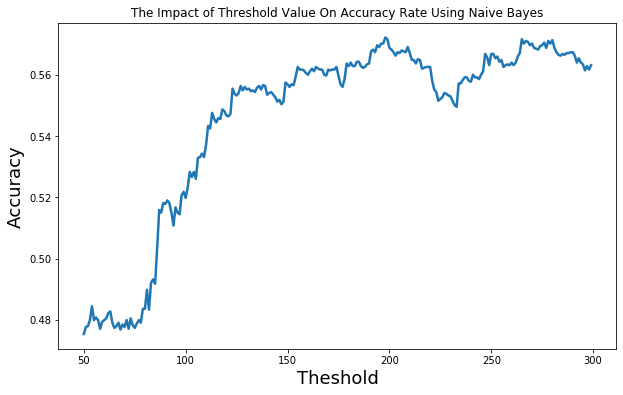

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(thresholds, accs, linewidth=2.5)
plt.xlabel('Theshold', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.title('The Impact of Threshold Value On Accuracy Rate Using Naive Bayes')
plt.show()

*****

## SVM